Total number of rows: 150
Number of rows after deleting null rows: 150


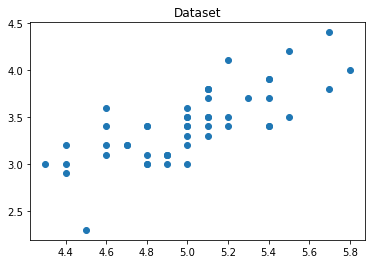

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: ConvergenceWarning: Number of distinct clusters (38) found smaller than n_clusters (39). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: ConvergenceWarning: Number of distinct clusters (38) found smaller than n_clusters (40). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: ConvergenceWarning: Number of distinct clusters (38) found smaller than n_clusters (41). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: ConvergenceWarning: Number of distinct clusters (38) found smaller than n_clusters (42). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: ConvergenceWarning: Number of distinct clusters (38) found smaller than n_clusters (43). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packa

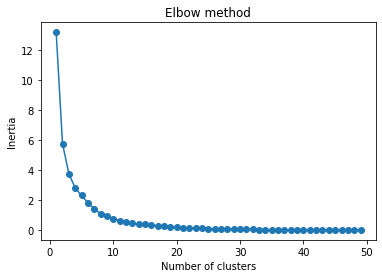

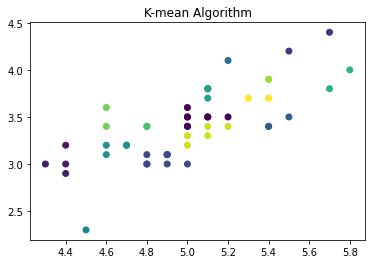

         P1        P2
0  1.015098 -0.130211
1 -0.868017 -0.407130
2 -0.936907  0.294540
3 -0.947452  0.251496
4  0.752805  0.725005


In [146]:
import pandas as pd
data=pd.read_csv("/FlowersData.csv")

#Limiting dataset to two datapoints Tn(Minimum temperature) and Tx(Maximum temperature)
new_data=pd.DataFrame().assign(sepal_length=data['sepal_length'], sepal_width=data['sepal_width'])
print("Total number of rows:", len(new_data))

#Removing null rows
df1 = new_data.dropna()
print("Number of rows after deleting null rows:", len(df1))

# deleting last 140 rows so our dataframe limits to 10 rows
df2=df1.drop(index=df1.index[-100:])

#Assigning x1 to maximum temperature and x2 to minimum temperature.
import numpy as np
x1 = np.array(df2['sepal_length'])
x2 = np.array(df2['sepal_width'])

import matplotlib.pyplot as plt
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# Identifying k using elbow method
from sklearn.cluster import KMeans
#turn the data into a set of points
X = list(zip(x1, x2))
inertias = []
for i in range(1,50):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,50), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#Visualizing clusters
kmeans = KMeans(n_clusters=15)
kmeans.fit(X)
plt.title("K-mean Algorithm")
plt.scatter(x1, x2, c=kmeans.labels_)
plt.show()

#from sklearn.cluster import DBSCAN
#dbscan=DBSCAN(eps=1,min_samples=1).fit(X)
#dbscan.labels_

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.0375, min_samples = 1).fit(X_principal)
labels = db_default.labels_